IWA Empirical Project 5 Source

1. Choose two countries. You will be using their data, for 1980 and 2014, as the basis for your Lorenz curves. Use the country data you have selected to calculate the cumulative income share of each decile. (Remember that each decile represents 10% of the population.)

In [2]:
import statistics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Procedure to generate cumulative income shares for the full dataset, saving to a new dataset data_inequality.csv
def create_income_dist():

    df = pd.read_csv('data.csv', skiprows=2)
    df_lorenz = pd.DataFrame()
    df_lorenz['Country'] = df['Country']
    df_lorenz['Year'] = df['Year']

    df['total_income'] = df['Mean Income'] * df['Population']

    cumulative_income = np.zeros_like(df['total_income'])
    df_lorenz['Decile 0 Share'] = 0
    for i in range(0, 10):
        cumulative_income += df[f'Decile {i + 1} Income'] * df['Population'] / 10
        df_lorenz[f'Decile {i + 1} Share'] = cumulative_income / df['total_income']

    df_lorenz.to_csv('data_inequality.csv', index=False)

create_income_dist()

2. Use the cumulative income shares to draw Lorenz curves for each country in order to visually compare the income distributions over time.

a) Draw a line chart with cumulative share of population on the horizontal axis and cumulative share of income on the vertical axis. Make sure to include a chart legend, and label your axes and chart appropriately.

b) Follow the steps in Python walk-through 5.3 to add a straight line representing perfect equality to each chart. (Hint: If income was shared equally across the population, the bottom 10% of people would have 10% of the total income, the bottom 20% would have 20% of the total income, and so on.)

gini of Japan in 1980 is 0.280339995125518
gini of Japan in 2014 is 0.30806560753162704
gini of South Africa in 1980 is 0.6118424292162497
gini of South Africa in 2014 is 0.6368631516681474


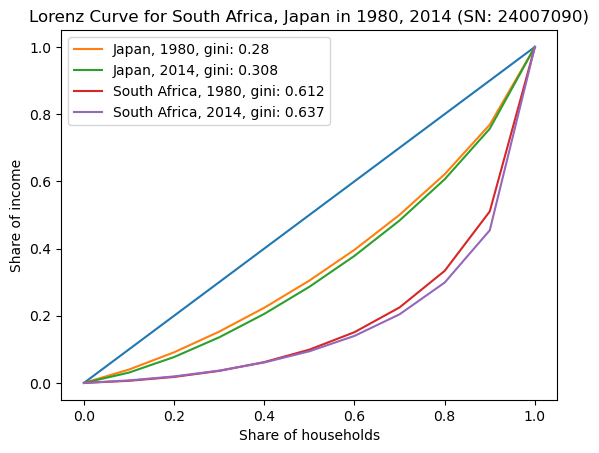

In [3]:
def gini_coefficient(x):
    b = np.trapezoid(x, np.arange(0, 1.1, 0.1))
    return 1-2*b


# Function to get the cumulative income share for a specific country and year
def get_dist(data, year, country):
    return data.loc[(data['Country'] == country) & (data['Year'] == year)]


# Function to plot the lorenz curve using the output of get_dist as its input
def plot_lorenz(data_sets):

    countries = []
    years = []

    plt.xlabel('Share of households')
    plt.ylabel('Share of income')

    deciles = np.arange(0, 1.1, 0.1)

    # Plots the line of perfect inequality
    plt.plot(deciles, deciles)

    for data in data_sets:
        country = data['Country'].iloc[0]
        countries.append(country)
        year = data['Year'].iloc[0]
        years.append(str(year))
        data_pts = data.drop(['Country', 'Year'], axis=1)
        y_points = data_pts.iloc[0]
        gini = gini_coefficient(y_points)
        print(f'gini of {country} in {year} is {gini}')
        # Plots the Lorenz curve
        plt.plot(deciles, y_points, label=f'{country}, {year}, gini: {round(gini,3)}')

    plt.title(f'Lorenz Curve for South Africa, Japan in 1980, 2014 (SN: 24007090)')
    plt.legend()

    plt.show()

df = pd.read_csv('data_inequality.csv')
jp_1 = get_dist(df, 1980, 'Japan')
jp_2 = get_dist(df, 2014, 'Japan')
sa_1 = get_dist(df, 1980, 'South Africa')
sa_2 = get_dist(df, 2014, 'South Africa')
plot_lorenz([jp_1, jp_2, sa_1, sa_2])

3. Using your Lorenz curves:
a) Compare the distribution of income across time for each country.

Both saw a relatively small increase in inequality from 1980 to 2014.

b) Compare the distribution of income across countries for each year (1980 and 2014).

For each year, South Africa's income distribution was far less equal than in Japan (0.308 vs 0.637 in 2014)

c) Suggest some explanations for any similarities and differences you observe. (You may want to research your chosen countries to see if there were any changes in government policy, political events, or other factors that may affect the income distribution.)

Both countries saw a similar increase in inequality between the two time periods, but in absolute terms South Africa is much more unequal. This is likely due to the Apartheid regime in South Africa which resulted in a two class system. Although Apartheid ended in the 90s it seems that this has not reduced inequality in the long run.

4. Calculate the Gini coefficient for each of your Lorenz curves. You should have four coefficients in total. Label each Lorenz curve with its corresponding Gini coefficient, and check that the coefficients are consistent with what you see in your charts.

(chart already labelled above)

5. Look at the following ratios:

90/10 ratio = the ratio of Decile 10 income to Decile 1 income

90/50 ratio = the ratio of Decile 10 income to Decile 5 income (the median)

50/10 ratio = the ratio of Decile 5 income (the median) to Decile 1 income.

a) For each of these ratios, explain why policymakers might want to compare these two deciles in the income distribution.

90/10: Comparing the richest and poorest 10% of households

90/50: Comparing the richest households to the median

50/10: Comparing the median households to the poorest


b) What kinds of policies or events could affect these ratios?

Taxes and transfers:
Progressive taxation (decreases all three ratios)
Transfers such as public services (decreases all three ratios)
Reduction in the top bracket income tax rate (increases 90/50 and 90/50 ratio)


6. Compare summary measures of inequality for all available countries on the OECD website:

a) Plot the data for the ratio measures by changing the variable selected in the drop-down menu ‘Gini coefficient’. The three ratio measures we looked at previously are called ‘Interdecile P90/P10’, ‘Interdecile P90/P50’, and ‘Interdecile P50/P10’, respectively. (If you click the ‘Compare variables’ option, you can plot more than one variable (except the Gini coefficient) on the same chart.)

See code block below.

b) For each measure, give an intuitive explanation of how it is measured and what it tells us about income inequality. (For example: What do the larger and smaller values of this measure mean? Which parts of the income distribution does this measure use?)

The ratios tell us how many times greater on average the richer decile's income compared to the poorer one. Hence larger values of this measure means inequality is greater. This measure uses specific parts of the income distribution (20% of it to be exact) targetting two specific deciles.

c) Do countries that rank highly on the Gini coefficient also rank highly on the ratio measures, or do the rankings change depending on the measure used? Based on your answers, explain why it is important to look at more than one summary measure of a distribution.

Yes, there is a strong correlation between ranking highly on the Gini coefficient and on the ratio measures. However, due to the nature of the ratio measure only using 20% of the income distribution, sometimes one ratio could rank very low whilst having a high Gini coefficient if, for example, the 50/10 ratio is low but the 90/10 ratio is very high. This explains why it is important to look at more than one summary measure of a distribution.

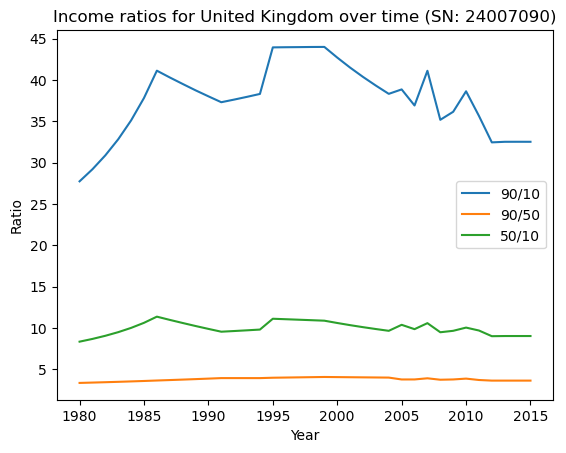

In [5]:
def calc_ratios():
    df = pd.read_csv('data_inequality_ginis.csv')
    ninety_ten = df['Decile 10 Share']/df['Decile 1 Share']
    ninety_fifty = df['Decile 10 Share'] / df['Decile 5 Share']
    fifty_ten = df['Decile 5 Share'] / df['Decile 1 Share']
    df['90/10'] = ninety_ten
    df['90/50'] = ninety_fifty
    df['50/10'] = fifty_ten

    df.to_csv('data_inequality_ratios.csv', index=False)


def plot_ratios(country):
    df = pd.read_csv('data_inequality_ratios.csv')
    plot_data = df.loc[df['Country'] == country, ['Year', '90/10', '90/50', '50/10']]
    plt.plot(plot_data['Year'], plot_data['90/10'], label='90/10')
    plt.plot(plot_data['Year'], plot_data['90/50'], label='90/50')
    plt.plot(plot_data['Year'], plot_data['50/10'], label='50/10')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Ratio')
    plt.title(f'Income ratios for {country} over time (SN: 24007090)')
    plt.show()


plot_ratios('United Kingdom')

7. Go to the Chartbook of Economic Inequality, which contains five measures of income inequality, including the Gini coefficient, for 25 countries around the world.

a) Choose two measures of income inequality that you find interesting (excluding the Gini coefficient). For each measure, give an intuitive explanation of how it is measured and what we can learn about income inequality from it. You may find the page on ‘Inequality measures’ helpful. (For example: What do larger or smaller values of this measure mean? Which parts of the income distribution does this measure use?)

Share of top 1% in total net wealth: Measured by finding the proportion of total wealth in a country owned by the richest 1% of individuals. This compares the entire distribution to the top 1%. Larger values of this measure signal greater inequality. This measure is particularly useful for identifying countries where wealth is extremely concentrated.

% of households with disposable income below 60% of the median: This measure is also known as the relative poverty threshold in the UK. Higher values indicate greater inequality. This measure uses an uncertain part of the income distribution compared against the median. This measure is useful to identify what proportion of the population is struggling/in relative poverty as a result of inequality.

b) On the Chartbook of Economic Inequality main page, charts of these measures are available for all countries shown in green on the map. For two countries of your choice, look at the charts and explain what these measures tell us about inequality in those countries.

In the UK, top 1% wealth fell dramatically from 73% to 19% between 1900 and 2015.
In the US, top 1% wealth has been volatile hovering from 25-45%.

In the UK, relative poverty has remained around 16%.
In the US, relative poverty has remained around 18% (however the US measures it with 50% of median threshold so this is not an apples to apples comparison)

What this tells us is that although relative poverty has been fairly stable, the top 1% wealth has been far more volatile where in the UK it has fallen much more than in the US. This suggests the UK has reduced inequality over the 20th century whereas in the US it has stagnated.

1. Using the mortality inequality data for the 10 selected countries:

a) Plot all the countries on the same line chart, with Gini coefficient on the vertical axis and year (1952–2002 only) on the horizontal axis. Make sure to include a legend showing country names, and label the axes appropriately.

See code block below.

b) Describe any general patterns in mortality inequality over time, as well as any similarities and differences between countries.

All countries saw a reduction in mortality inequality over time. In particular, India and Brazil saw a much greater reduction in inequality over the 50 year period, likely due to the rapid development of these countries during the late 20th century.

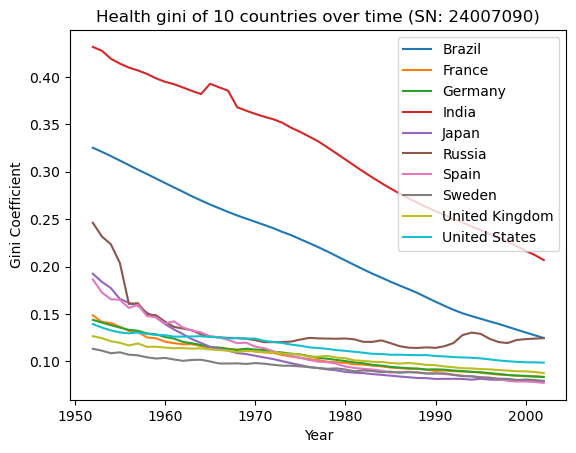

In [6]:
def health_inequality():
    df = pd.read_csv('gini-coefficient-of-lifespan-inequality-in-females.csv')
    sel_year = range(1952, 2003, 1)
    sel_country = ["Brazil", "France", "Germany", "India", "Japan", "Russia", "Spain", "Sweden", "United Kingdom",
                   "United States"]

    df_gini_10 = df.loc[(df["Year"].isin(sel_year)) & (df["Entity"].isin(sel_country)), :]

    for country in sel_country:
        data = df_gini_10.loc[df_gini_10['Entity'] == country, ['Year', 'life_expectancy_gini__sex_female']]
        plt.plot(data['Year'], data['life_expectancy_gini__sex_female'], label=country)

    plt.xlabel('Year')
    plt.ylabel('Gini Coefficient')
    plt.title('Health gini of 10 countries over time (SN: 24007090)')
    plt.legend()
    plt.show()
health_inequality()

2. Now compare the Gini coefficients in the first year of your line chart (1952) with the last year (2002).

a) For the year 1952, sort the countries according to their mortality inequality Gini coefficient from smallest to largest. Plot a column chart showing these Gini coefficients on the vertical axis, and country on the horizontal axis.

b) Repeat Question 2(a) for the year 2002.

c) Comparing your charts for 1952 and 2002, have the rankings between countries changed? Suggest some explanations for any observed changes. (You may want to do some additional research, for example, look at the healthcare systems of these countries.)

The most notable movement is the USA's inequality increasing. This is likely due to the lack of public healthcare provision in the US which is available in many other countries which restricts poorer households from being able to access healthcare.

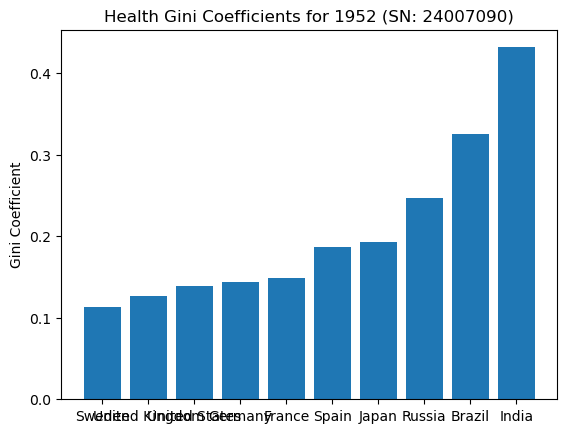

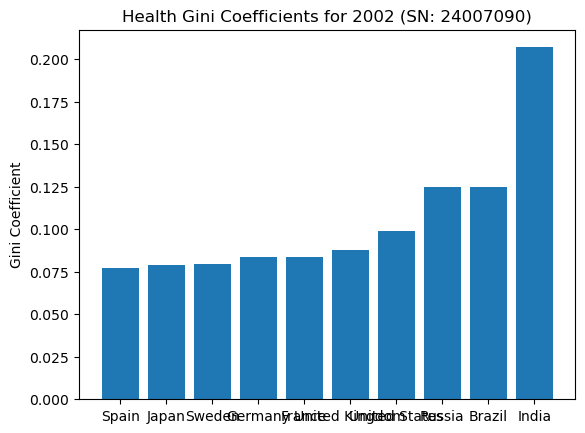

In [7]:
def col_plots(year):
    df = pd.read_csv('gini-coefficient-of-lifespan-inequality-in-females.csv')
    sel_year = range(1952, 2003, 1)
    sel_country = ["Brazil", "France", "Germany", "India", "Japan", "Russia", "Spain", "Sweden", "United Kingdom",
                   "United States"]

    df_gini_10 = df.loc[(df["Year"].isin(sel_year)) & (df["Entity"].isin(sel_country)), :]

    data = df_gini_10.loc[df_gini_10['Year'] == year, ['Entity', 'life_expectancy_gini__sex_female']]
    data.sort_values(by=['life_expectancy_gini__sex_female'], inplace=True)
    plt.bar(data['Entity'], data['life_expectancy_gini__sex_female'])
    plt.ylabel('Gini Coefficient')
    plt.title(f'Health Gini Coefficients for {year} (SN: 24007090)')
    plt.show()

col_plots(1952)
col_plots(2002)

3. For your chosen measure:

a) Explain how it is constructed and what outcomes it assesses.

Measures the % of each wealth quintile in a given country at a given point in time who use public vs private healthcare. Assesses whether richer households access better healthcare on average than poorer households to measure inequality.

b) Create an appropriate chart to summarize the data for all available countries. (You can replicate a chart shown on the website or draw a similar chart.)

See code block below.

c) Explain what your chart shows about health inequality within and between countries, and discuss the limitations of using this measure (for example, measurement issues or other aspects of inequality that this measure ignores).

This chart shows that generally richer households are more likely to use private healthcare on average, showing that there is health inequality in these countries. However, a limitation of this measure is that we assume private healthcare provides better quality care than public which is not always true.

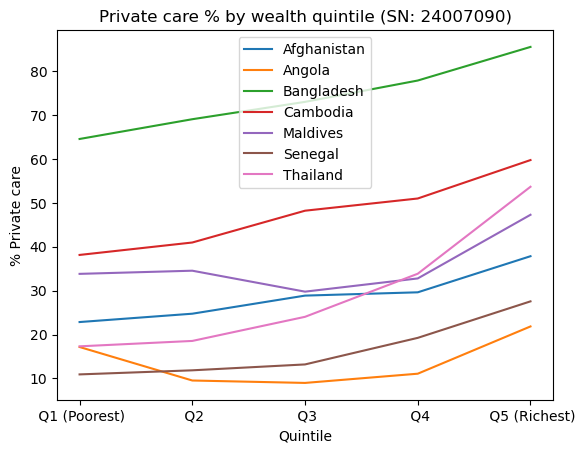

In [14]:
def private_care():
    df = pd.read_csv('CARE_SOURCE.csv', skiprows=2)
    sel_country = ["Afghanistan", "Angola", "Bangladesh", "Cambodia", "Maldives", "Senegal", "Thailand"]

    for country in sel_country:
        data = df.loc[df['Countries, territories and areas'] == country, ['Wealth Quintile', ' Private']]
        plt.plot(data['Wealth Quintile'], data[' Private'], label=country)

    plt.xlabel('Quintile')
    plt.ylabel('% Private care')
    plt.title('Private care % by wealth quintile (SN: 24007090)')
    plt.legend()
    plt.show()
    
    
private_care()

4. For your chosen measure:

a) Choose ten countries that have data from 1980 to 2010. Plot your chosen countries on the same line chart, with year on the horizontal axis and share on the vertical axis. Make sure to include a legend showing country names and label the axes appropriately.

See code block below.

b) Describe any general patterns in gender inequality in education over time, as well as any similarities and differences between countries.

India experienced a huge increase in the GPIA index between 1970 and 2020. Most developed countries remained stable hovering around a 1.0.

c) Calculate the change in the value of this measure between 1980 and 2010 for each country chosen. Sort these countries according to this value, from the smallest change to largest change. Now plot a column chart showing the change (1980 to 2010) on the vertical axis, and country on the horizontal axis. Add data labels to display the value for each country.

Not possible (lack of data from these years for some of my countries).

d) Which country had the largest change? Which country had the smallest change?

Largest change: India
Smallest change: ?

e) Suggest some explanations for your observations in Questions 4(b) and (d). (You may want to do some background research on your chosen countries.)

Most countries chosen were already developed and thus had good provision of education available to all individuals, but India rapidly developed between 1970 and 2020 and therefore had the largest change.

f) Discuss the limitations of using this measure to assess the degree of gender inequality in educational attainment and propose some alternative measures.

The main limitation is that it focuses on inequality in primary school education, which is now generally available to all individuals. A measure which looks into secondary and higher education may reveal inequality at a later stage of educational attainment.

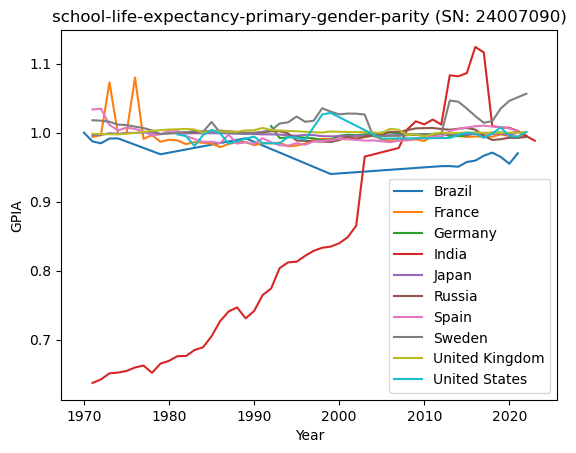

In [13]:
def gender_parity():
    df = pd.read_csv('school-life-expectancy-primary-gender-parity-index-gpi.csv')

    chosen_countries = ["Brazil", "France", "Germany", "India", "Japan", "Russia", "Spain", "Sweden", "United Kingdom",
                   "United States"]

    for country in chosen_countries:
        data = df.loc[df['Entity'] == country, ['Year', 'GPIA']]
        plt.plot(data['Year'], data['GPIA'], label=country)

    plt.xlabel('Year')
    plt.ylabel('GPIA')
    plt.title('school-life-expectancy-primary-gender-parity (SN: 24007090)')
    plt.legend()
    plt.show()
    
    
gender_parity()